In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns 
    
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
# configuring dataframe
bos = pd.DataFrame(boston.data)

bos.columns = boston.feature_names
# adding target (price) to the dataframe
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
bos['CATEGORY'] = pd.cut(bos['PRICE'], 3, labels=[0, 1, 2])
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,CATEGORY
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,1
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,1
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,2


In [9]:
# declare inputs and target variables
target = bos['CATEGORY']
inputs = bos.drop(['PRICE','CATEGORY'], axis=1)

In [10]:
target.head()

0    1
1    1
2    1
3    1
4    2
Name: CATEGORY, dtype: category
Categories (3, int64): [0 < 1 < 2]

Split the dataset into 70% training set and 30% test set.

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(inputs, target, shuffle=True, stratify=target, test_size=0.3, random_state=8)

Using scikit-learn’s DecisionTreeClassifier, train a supervised learning model that can
be used to generate predictions for your data.

In [12]:
dtc_gini = DecisionTreeClassifier(criterion='gini', random_state=999)

In [13]:
dtc_gini.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=999, splitter='best')

Report the tree depth, number of leaves, feature importance, train score, and test score
of the tree. Let the tree depth be Td.

In [14]:
dtc_gini
train_pred = dtc_gini.predict(X_train)
test_pred = dtc_gini.predict(X_test)
print("train score", accuracy_score(Y_train, train_pred))
print("test score", accuracy_score(Y_test, test_pred))
print("tree depth (Td)", dtc_gini.get_depth())
print("number of leaves", dtc_gini.get_n_leaves())
print("feature importance", dtc_gini.feature_importances_)


train score 1.0
test score 0.7763157894736842
tree depth (Td) 11
number of leaves 43
feature importance [0.07523077 0.008394   0.02552833 0.         0.03928398 0.22166585
 0.10171505 0.03505712 0.         0.04117713 0.01670301 0.03667134
 0.39857343]


In [15]:
dtc_entropy = DecisionTreeClassifier(criterion='entropy', random_state=999)

In [16]:
dtc_entropy.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=999, splitter='best')

Report the tree depth, number of leaves, feature importance, train score, and test score
of the tree. Let the tree depth be Td.

In [17]:
dtc_entropy
train_pred = dtc_entropy.predict(X_train)
test_pred = dtc_entropy.predict(X_test)
print("train score", accuracy_score(Y_train, train_pred))
print("test score", accuracy_score(Y_test, test_pred))
print("tree depth (Td)", dtc_entropy.get_depth())
print("number of leaves", dtc_entropy.get_n_leaves())
print("feature importance", dtc_entropy.feature_importances_)

train score 1.0
test score 0.7828947368421053
tree depth (Td) 10
number of leaves 43
feature importance [0.01532972 0.         0.03184739 0.         0.02662933 0.20605586
 0.10655524 0.09303621 0.00559662 0.02249056 0.03566222 0.01329697
 0.44349987]


Show the visual output of the decision tree.


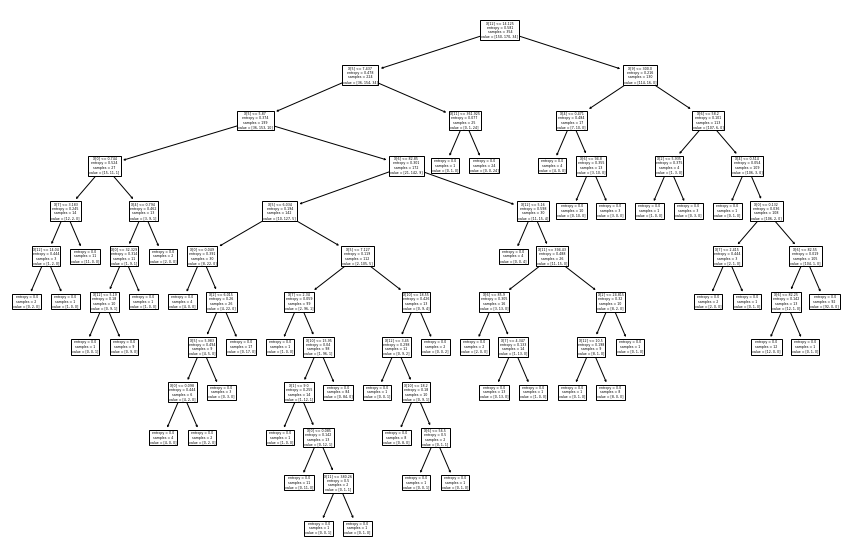

In [18]:
plt.figure(figsize=(15,10))
ax = tree.plot_tree(dtc_gini)


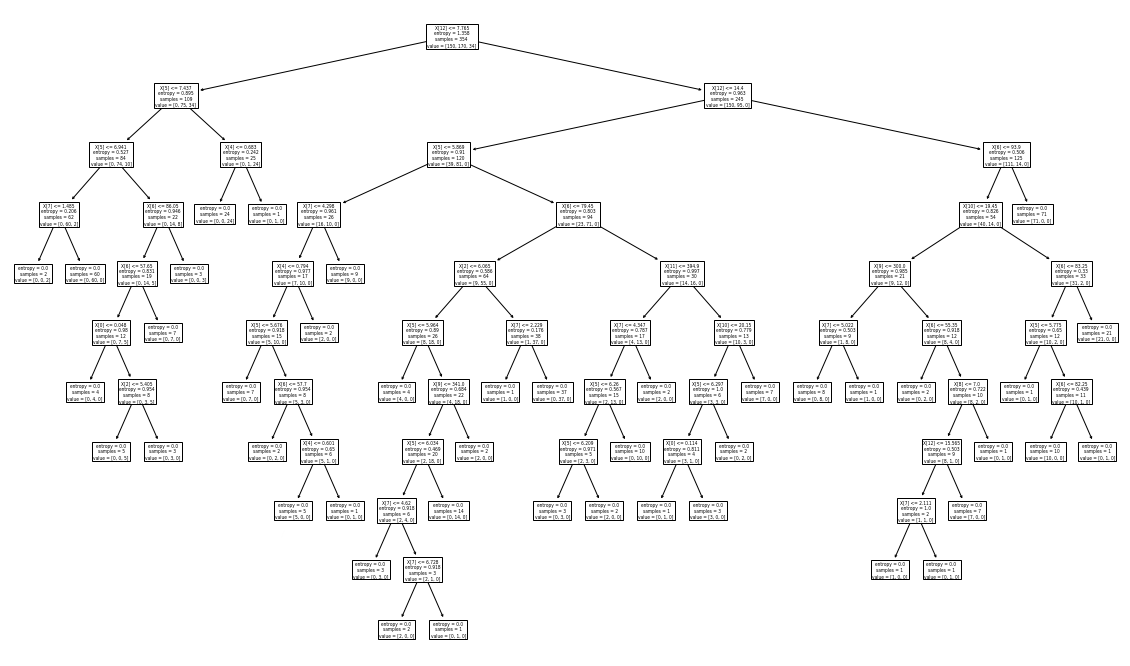

In [19]:
plt.figure(figsize=(20,12))
ax = tree.plot_tree(dtc_entropy)




Next, Generate (Td-1) decision trees on the same training set using fixed tree depths
{1, 2, ...(T d − 1)}. The tree depth can be set using max=d, where d is the depth of the
tree.


In [20]:
def generate_trees(depth, criterion):
    for i in range(1,depth):
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=i)
        clf.fit(X_train, Y_train)
        train_pred = clf.predict(X_train)
        test_pred = clf.predict(X_test)
        
        print("tree depth (Td)", clf.get_depth())
        print("number of leaves", clf.get_n_leaves())
        print("feature importance", clf.feature_importances_)
        print("train score", accuracy_score(Y_train, train_pred))
        print("test score", accuracy_score(Y_test, test_pred))
        print()
        

For each of the (Td-1) trees report, tree depth, number of leaves, feature importance,
train score, and test score of the tree.


In [21]:
generate_trees(dtc_entropy.get_depth(), 'entropy')

tree depth (Td) 1
number of leaves 2
feature importance [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
train score 0.635593220338983
test score 0.6513157894736842

tree depth (Td) 2
number of leaves 4
feature importance [0.        0.        0.        0.        0.        0.1833922 0.
 0.        0.        0.        0.        0.        0.8166078]
train score 0.8192090395480226
test score 0.7960526315789473

tree depth (Td) 3
number of leaves 8
feature importance [0.         0.         0.         0.         0.         0.2208447
 0.06176388 0.         0.         0.02005367 0.         0.
 0.69733775]
train score 0.8389830508474576
test score 0.8092105263157895

tree depth (Td) 4
number of leaves 13
feature importance [0.         0.         0.         0.         0.         0.19100076
 0.0908239  0.06048026 0.01734371 0.         0.03724864 0.
 0.60310274]
train score 0.8700564971751412
test score 0.7894736842105263

tree depth (Td) 5
number of leaves 19
feature importance [0.         0.         0.02

Show the visual output of the decision tree with highest test score from the (Td-1)
trees.

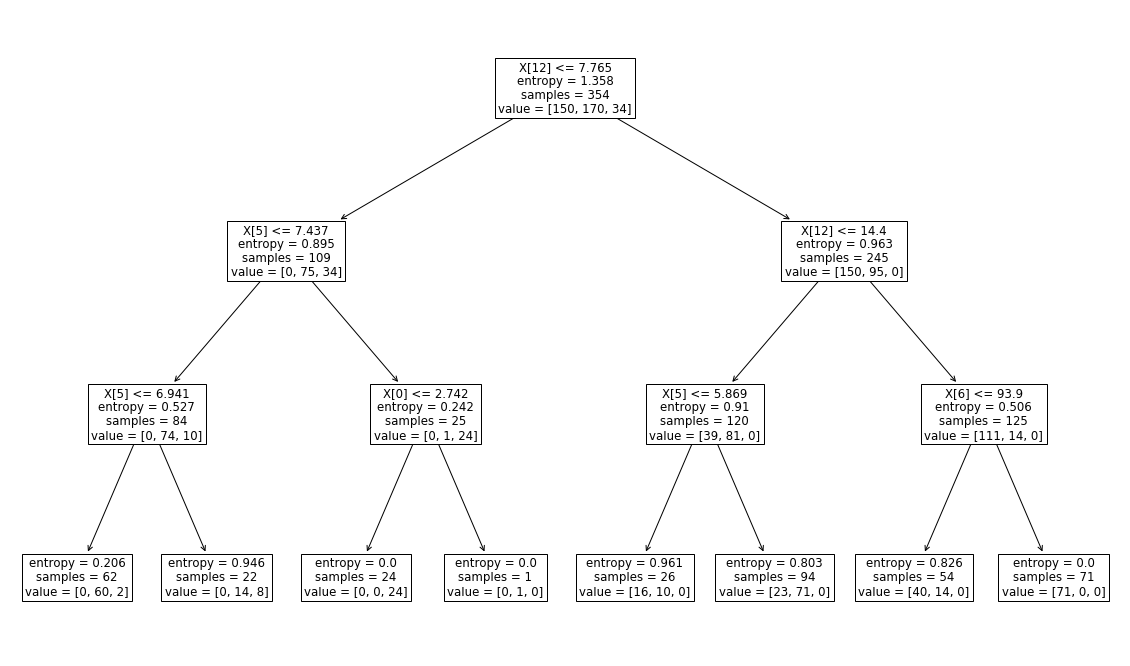

In [22]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=3)
clf.fit(X_train, Y_train)
plt.figure(figsize=(20,12))
ax = tree.plot_tree(clf)
